<a href="https://colab.research.google.com/github/KarmaticNeutral/cse380-notebooks/blob/master/W10/10_2_Ponder_and_Prove_Spanning_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Spanning Trees
## Due: Saturday, 13 March 2021, 11:59 pm

## The Goal

The goal of this assignment is to investigate spanning trees of graphs.

Here is the example spanning tree you saw in your DPC:

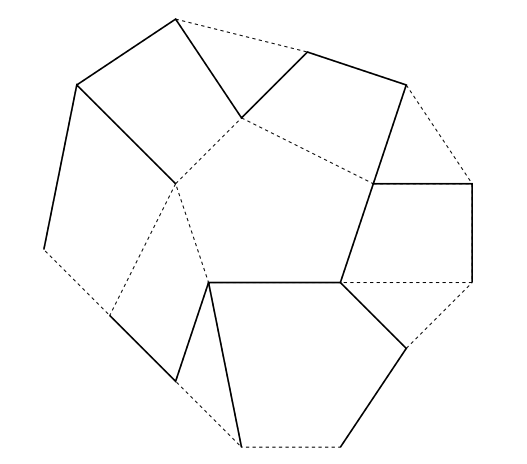

Wikipedia has a [Spanning Tree](https://en.wikipedia.org/wiki/Spanning_tree) page with useful information.

## Algorithm to Find a Spanning Tree

In five pseudocode steps:
1. Start with the "frontier" being a list of size one --- containing just the first node.
2. Pick a link connected to a node in the frontier that does not create a cycle --- that is, the other (destination) node of the link is not already in the frontier.
3. Add that destination node to the frontier unless already there.
4. Add the picked link to the spanning-tree.
5. Repeat steps 2-4 until all nodes are in the frontier.

## What to Create

1. A graph representation --- a way to represent both nodes and links.
2. A function that takes a graph and returns a list of its nodes.
3. A function that takes a graph and returns a list of its links.
4. A function that takes a graph and returns an adjacency list of nodes and links.
5. A function that takes a graph and a node and returns a list of adjacent nodes to that node.

#### Creation Objective 1

In [155]:

class Node:
    def __init__(this, id):
        this.id = id
        this.links = []
    
    def add_link(this, target_node):
        this.links.append((this, target_node))
        target_node.links.append((target_node, this))

    def print_links(this):
        for link in this.links:
            print(link[0].id, link[1].id)

    def adj_nodes(this):
        an = []
        for link in this.links:
            for node in link:
                if node != this:
                    an.append(node)
        return an

class Graph:
    def __init__(this, id):
        this.id = id
        this.nodes = []
    
    def all_links(this):
        raw_al = set()
        #print(len(this.nodes))
        for node in this.nodes:
            #node.print_links()
            for link in node.links:
                raw_al.add(link)
        #print(len(raw_al))
        al = set()
        for l1 in raw_al:
            matches = False
            for l2 in al:
                if (l1[1], l1[0]) == l2:
                    matches = True
            if matches == False:
                al.add(l1)
        return al

    def adj_list(this):
        al = {}
        for node in this.nodes:
            al[node] = []
            for link in node.links:
                al[node].append(link[1])
        return al

    def add_new_node(this, id):
        n = Node(id)
        this.nodes.append(n)
        return n
    
    def print_adj_list(this):
        al = this.adj_list()
        for base_node in al:
            print(base_node.id, " -> ", end = "")
            for node in al[base_node]:
                print(node.id, end=" ")
            print()

In [163]:
g1 = Graph("G1")

a1 = g1.add_new_node("A1")

b1 = g1.add_new_node("B1")
b1.add_link(a1)

c1 = g1.add_new_node("C1")
c1.add_link(a1)

d1 = g1.add_new_node("D1")
d1.add_link(b1)
d1.add_link(c1)

In [127]:
g2 = Graph("G2")

a2 = g2.add_new_node("A2")

b2 = g2.add_new_node("B2")
b2.add_link(a2)

c2 = g2.add_new_node("C2")
c2.add_link(a2)

d2 = g2.add_new_node("D2")
d2.add_link(b2)
d2.add_link(c2)

e2 = g2.add_new_node("E2")
e2.add_link(c2)

f2 = g2.add_new_node("F2")
f2.add_link(e2)
f2.add_link(d2)

#### Creation Objective 2

In [128]:
for node in g1.nodes:
    print(node.id)

A1
B1
C1
D1


#### Creation Objective 3

In [129]:
links2 = g2.all_links()
for link in links2:
    for node in link:
        print(node.id, end = "")
    print()

B2D2
D2F2
D2C2
B2A2
A2C2
E2F2
E2C2


#### Creation Objective 4

In [139]:
al = g2.adj_list()
for base_node in al:
    print(base_node.id, " -> ", end = "")
    for node in al[base_node]:
        print(node.id, end=" ")
    print()

A2  -> B2 C2 
B2  -> A2 D2 
C2  -> A2 D2 E2 
D2  -> B2 C2 F2 
E2  -> C2 F2 
F2  -> E2 D2 


#### Creation Objective 5

In [130]:
for node in a2.adj_nodes():
    print(node.id)

B2
C2


#### Approach Spanning Tree

In [160]:
#Start with the "frontier" being a list of size one --- containing just the first node.
#Pick a link connected to a node in the frontier that does not create a cycle --- that is, the other (destination) node of the link is not already in the frontier.
#Add that destination node to the frontier unless already there.
#Add the picked link to the spanning-tree.
#Repeat steps 2-4 until all nodes are in the frontier.
def build_spanning_tree(graph):
    frontier = Graph("Frontier1")
    frontier.nodes.append(graph.nodes[0])
    frontier_links = []
    while len(frontier.nodes) < len(graph.nodes):
        to_add = []
        for node in frontier.nodes:
            for link in node.links:
                if link[1] not in to_add and link[1] not in frontier.nodes:
                    frontier_links.append(link)
                    to_add.append(link[1])
        for node in to_add:
            frontier.nodes.append(node)

    for node in frontier.nodes:
        node.links = []
    for link in frontier_links:
        link[0].links.append(link)
        link[1].links.append((link[1], link[0]))

    #print(len(frontier.nodes), len(graph.nodes))
    #for node in frontier.nodes:
    #    print(node.id)

    frontier.print_adj_list()

## Test Your Code

You will need several different types of graphs (including ladder graphs) with which to test your algorithm.


See the self-assessment for specifics.

#### 2 Rung Ladder Test

In [164]:
build_spanning_tree(g1)

A1  -> B1 C1 
B1  -> A1 D1 
C1  -> A1 
D1  -> B1 


#### 3 Rung Ladder Test

In [162]:
build_spanning_tree(g2)

A2  -> B2 C2 
B2  -> A2 D2 
C2  -> A2 E2 
D2  -> B2 F2 
E2  -> C2 
F2  -> D2 


#### 4 Rung Ladder Test

In [168]:
lad4 = Graph("4 Rung Ladder")

a = lad4.add_new_node("A")
b = lad4.add_new_node("B")
c = lad4.add_new_node("C")
d = lad4.add_new_node("D")
e = lad4.add_new_node("E")
f = lad4.add_new_node("F")
g = lad4.add_new_node("G")
h = lad4.add_new_node("H")

a.add_link(b)
a.add_link(c)
b.add_link(d)
c.add_link(d)
c.add_link(e)
d.add_link(f)
e.add_link(f)
e.add_link(g)
f.add_link(h)
g.add_link(h)

build_spanning_tree(lad4)

A  -> B C 
B  -> A D 
C  -> A E 
D  -> B F 
E  -> C G 
F  -> D H 
G  -> E 
H  -> F 


#### 5 Rung Ladder Test

In [169]:
lad5 = Graph("5 Rung Ladder")

a = lad5.add_new_node("A")
b = lad5.add_new_node("B")
c = lad5.add_new_node("C")
d = lad5.add_new_node("D")
e = lad5.add_new_node("E")
f = lad5.add_new_node("F")
g = lad5.add_new_node("G")
h = lad5.add_new_node("H")
i = lad5.add_new_node("I")
j = lad5.add_new_node("J")

a.add_link(b)
a.add_link(c)
b.add_link(d)
c.add_link(d)
c.add_link(e)
d.add_link(f)
e.add_link(f)
e.add_link(g)
f.add_link(h)
g.add_link(h)
g.add_link(i)
h.add_link(j)
i.add_link(j)

build_spanning_tree(lad5)

A  -> B C 
B  -> A D 
C  -> A E 
D  -> B F 
E  -> C G 
F  -> D H 
G  -> E I 
H  -> F J 
I  -> G 
J  -> H 


#### Example Graph Test

In [173]:
example = Graph("Example Graph")

a = example.add_new_node("A")
b = example.add_new_node("B")
c = example.add_new_node("C")
d = example.add_new_node("D")
e = example.add_new_node("E")
f = example.add_new_node("F")
g = example.add_new_node("G")
h = example.add_new_node("H")
i = example.add_new_node("I")
j = example.add_new_node("J")
k = example.add_new_node("K")
l = example.add_new_node("L")
m = example.add_new_node("M")
n = example.add_new_node("N")
o = example.add_new_node("O")
p = example.add_new_node("P")
q = example.add_new_node("Q")

a.add_link(b)
a.add_link(d)
a.add_link(e)

b.add_link(e)
b.add_link(c)

c.add_link(f)
c.add_link(g)

d.add_link(i)
d.add_link(h)

e.add_link(h)
e.add_link(f)

f.add_link(g)
f.add_link(k)

g.add_link(l)

h.add_link(m)
h.add_link(j)

i.add_link(m)

j.add_link(k)
j.add_link(o)
j.add_link(p)

k.add_link(l)
k.add_link(n)

l.add_link(n)

m.add_link(o)

n.add_link(q)

o.add_link(p)

p.add_link(q)

build_spanning_tree(example)

A  -> B D E 
B  -> A C 
D  -> A I H 
E  -> A F 
C  -> B G 
I  -> D M 
H  -> D J 
F  -> E K 
G  -> C L 
M  -> I O 
J  -> H P 
K  -> F N 
L  -> G 
O  -> M 
P  -> J Q 
N  -> K 
Q  -> P 


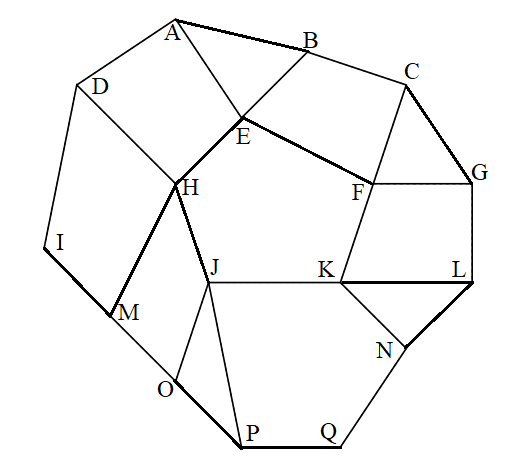

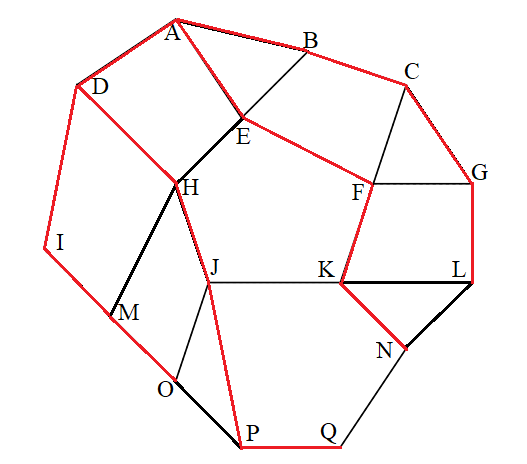

#### Custom Graph Test 1

In [177]:
custom1 = Graph("Custom Graph 1")

a = custom1.add_new_node("A")
b = custom1.add_new_node("B")
c = custom1.add_new_node("C")
d = custom1.add_new_node("D")
e = custom1.add_new_node("E")
f = custom1.add_new_node("F")
g = custom1.add_new_node("G")
h = custom1.add_new_node("H")
i = custom1.add_new_node("I")
j = custom1.add_new_node("J")
k = custom1.add_new_node("K")
l = custom1.add_new_node("L")
m = custom1.add_new_node("M")
n = custom1.add_new_node("N")
o = custom1.add_new_node("O")
p = custom1.add_new_node("P")
q = custom1.add_new_node("Q")
r = custom1.add_new_node("R")
s = custom1.add_new_node("S")
t = custom1.add_new_node("T")
u = custom1.add_new_node("U")
v = custom1.add_new_node("V")

a.add_link(b)
a.add_link(c)
b.add_link(c)
c.add_link(d)
d.add_link(e)
e.add_link(f)
f.add_link(i)
o.add_link(q)
g.add_link(h)
g.add_link(i)
h.add_link(i)
i.add_link(j)
i.add_link(k)
j.add_link(k)
k.add_link(l)
l.add_link(m)
e.add_link(r)
k.add_link(r)
l.add_link(j)
l.add_link(r)
s.add_link(u)
v.add_link(e)
d.add_link(f)
b.add_link(i)
m.add_link(r)
m.add_link(q)
p.add_link(s)
m.add_link(n)
n.add_link(o)
t.add_link(v)
g.add_link(n)
t.add_link(r)
n.add_link(j)
o.add_link(p)
p.add_link(q)
q.add_link(r)
r.add_link(s)
s.add_link(t)
t.add_link(u)
u.add_link(v)
q.add_link(s)

build_spanning_tree(custom1)

A  -> B C 
B  -> A I 
C  -> A D 
I  -> B F G H J K 
D  -> C E 
F  -> I 
G  -> I N 
H  -> I 
J  -> I L 
K  -> I R 
E  -> D V 
N  -> G M O 
L  -> J 
R  -> K T Q S 
V  -> E U 
M  -> N 
O  -> N P 
T  -> R 
Q  -> R 
S  -> R 
U  -> V 
P  -> O 


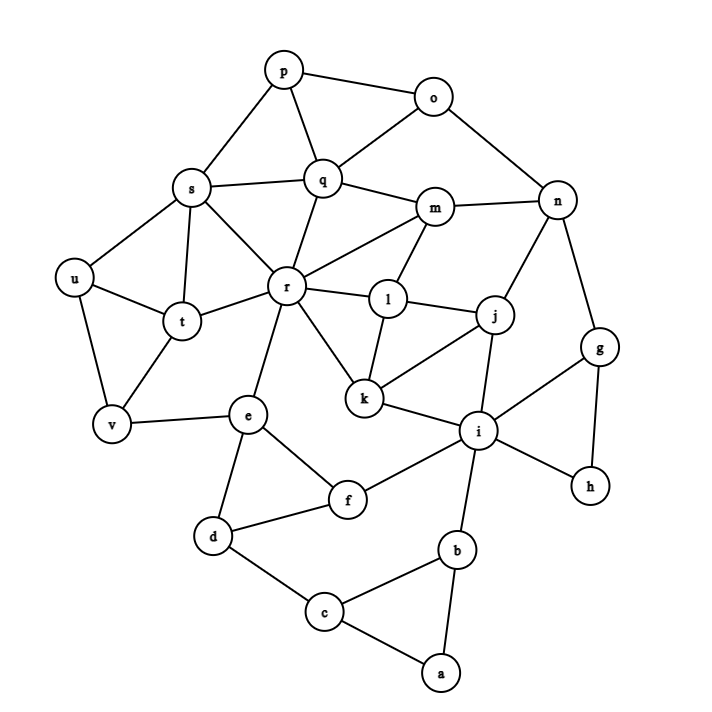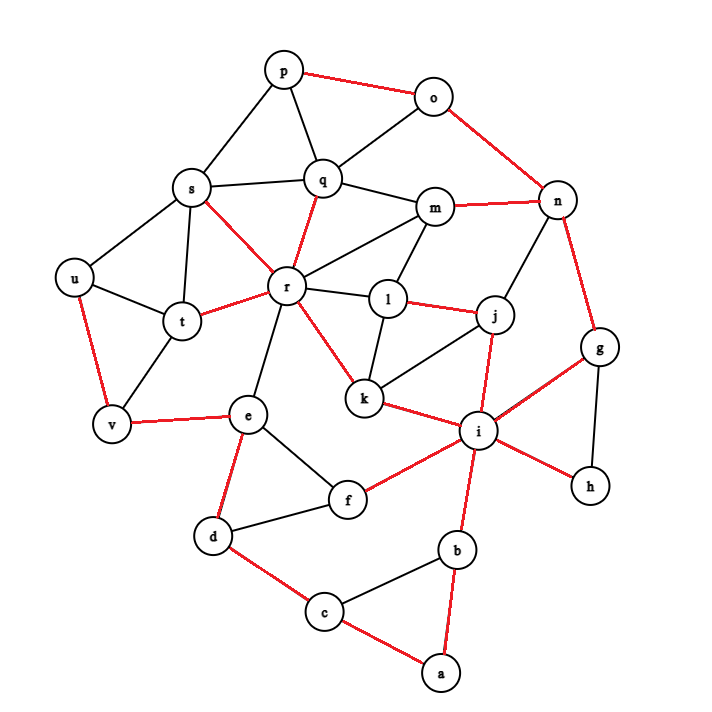

#### Custom Graph Test 2

In [178]:
custom2 = Graph("Custom Graph 1")

a = custom2.add_new_node("A")
b = custom2.add_new_node("B")
c = custom2.add_new_node("C")
d = custom2.add_new_node("D")
e = custom2.add_new_node("E")
f = custom2.add_new_node("F")
g = custom2.add_new_node("G")
h = custom2.add_new_node("H")
i = custom2.add_new_node("I")
j = custom2.add_new_node("J")
k = custom2.add_new_node("K")
l = custom2.add_new_node("L")
m = custom2.add_new_node("M")
n = custom2.add_new_node("N")
o = custom2.add_new_node("O")
p = custom2.add_new_node("P")
q = custom2.add_new_node("Q")
r = custom2.add_new_node("R")
s = custom2.add_new_node("S")
t = custom2.add_new_node("T")
u = custom2.add_new_node("U")

a.add_link(u)
b.add_link(t)
c.add_link(s)
d.add_link(r)
e.add_link(q)
f.add_link(p)
g.add_link(o)
h.add_link(n)
i.add_link(m)
j.add_link(l)
k.add_link(j)
j.add_link(m)
h.add_link(o)
l.add_link(j)
g.add_link(e)
q.add_link(d)
a.add_link(c)
u.add_link(p)
f.add_link(r)
r.add_link(a)
p.add_link(s)
n.add_link(u)
k.add_link(h)
h.add_link(l)
b.add_link(i)
t.add_link(k)
b.add_link(j)
t.add_link(h)
b.add_link(g)
e.add_link(s)
n.add_link(c)
q.add_link(k)
q.add_link(c)
f.add_link(a)
k.add_link(n)
t.add_link(l)
o.add_link(b)
g.add_link(i)
u.add_link(c)
m.add_link(i)
n.add_link(h)
o.add_link(g)
p.add_link(f)
q.add_link(e)
r.add_link(d)
s.add_link(c)
t.add_link(b)
u.add_link(a)

build_spanning_tree(custom2)

A  -> U C R F 
U  -> A P N 
C  -> A S Q 
R  -> A D 
F  -> A 
P  -> U 
N  -> U H K 
S  -> C E 
Q  -> C 
D  -> R 
H  -> N O L T 
K  -> N J 
E  -> S G 
O  -> H B 
L  -> H 
T  -> H 
J  -> K M 
G  -> E I 
B  -> O 
M  -> J 
I  -> G 


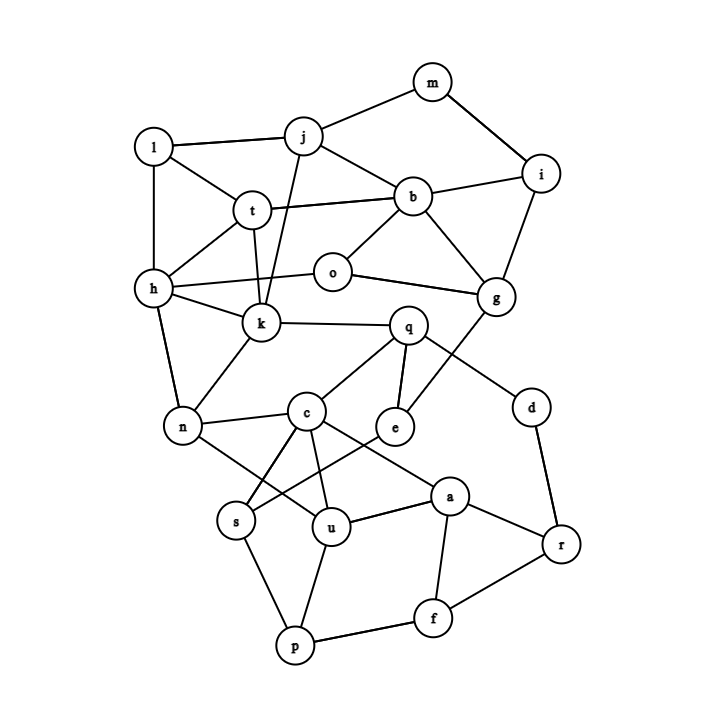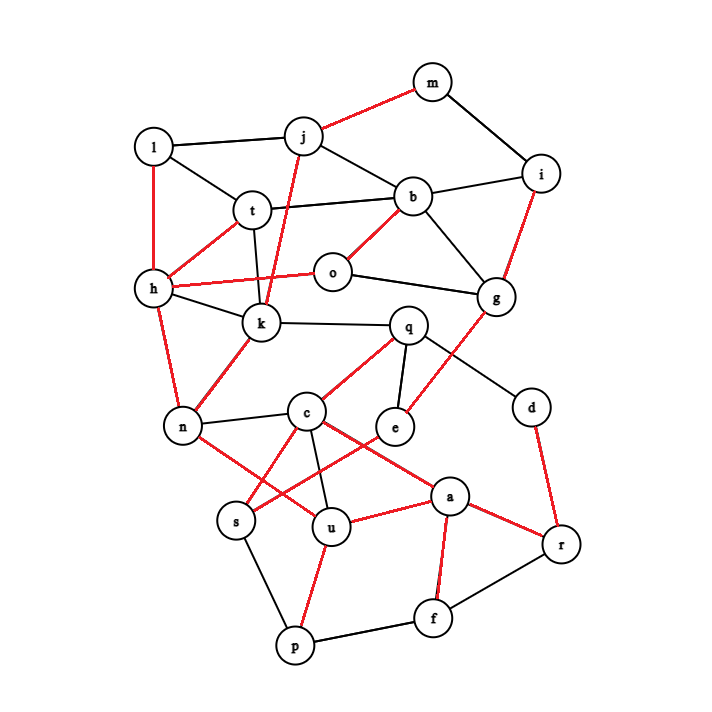

#### Custom Graph Test 3

In [181]:
custom3 = Graph("Custom Graph 3")

aa = custom3.add_new_node("AA")
ab = custom3.add_new_node("AB")
ac = custom3.add_new_node("AC")
ad = custom3.add_new_node("AD")
ae = custom3.add_new_node("AE")
af = custom3.add_new_node("AF")
ag = custom3.add_new_node("AG")
ah = custom3.add_new_node("AH")
ai = custom3.add_new_node("AI")
aj = custom3.add_new_node("AJ")
ak = custom3.add_new_node("AK")
al = custom3.add_new_node("AL")
am = custom3.add_new_node("AM")
an = custom3.add_new_node("AN")
ao = custom3.add_new_node("AO")
ap = custom3.add_new_node("AP")
aq = custom3.add_new_node("AQ")
ar = custom3.add_new_node("AR")
a5 = custom3.add_new_node("AS")
at = custom3.add_new_node("AT")
au = custom3.add_new_node("AU")
av = custom3.add_new_node("AV")
aw = custom3.add_new_node("AW")
ax = custom3.add_new_node("AX")
ay = custom3.add_new_node("AY")
az = custom3.add_new_node("AZ")

ba = custom3.add_new_node("BA")
bb = custom3.add_new_node("BB")
bc = custom3.add_new_node("BC")
bd = custom3.add_new_node("BD")
be = custom3.add_new_node("BE")
bf = custom3.add_new_node("BF")
bg = custom3.add_new_node("BG")
bh = custom3.add_new_node("BH")
bi = custom3.add_new_node("BI")
bj = custom3.add_new_node("BJ")
bk = custom3.add_new_node("BK")
bl = custom3.add_new_node("BL")
bm = custom3.add_new_node("BM")
bn = custom3.add_new_node("BN")
bo = custom3.add_new_node("BO")
bp = custom3.add_new_node("BP")
bq = custom3.add_new_node("BQ")
br = custom3.add_new_node("BR")
bs = custom3.add_new_node("BS")
bt = custom3.add_new_node("BT")
bu = custom3.add_new_node("BU")
bv = custom3.add_new_node("BV")
bw = custom3.add_new_node("BW")
bx = custom3.add_new_node("BX")
by = custom3.add_new_node("BY")
bz = custom3.add_new_node("BZ")

aa.add_link(bz)
ab.add_link(by)
ac.add_link(bx)
ad.add_link(bw)
ae.add_link(bv)
af.add_link(bu)
ag.add_link(bt)
ah.add_link(bs)
ai.add_link(br)
aj.add_link(bq)
ak.add_link(bp)
al.add_link(bo)
am.add_link(bn)
an.add_link(bm)
ao.add_link(bl)
ap.add_link(bk)
aq.add_link(bj)
ar.add_link(bi)
a5.add_link(bh)
at.add_link(bg)
au.add_link(bf)
av.add_link(be)
aw.add_link(bd)
ax.add_link(bc)
ay.add_link(bb)
az.add_link(ba)
aa.add_link(ba)
ab.add_link(bb)
ac.add_link(bc)
ad.add_link(bd)
ae.add_link(be)
af.add_link(bf)
ag.add_link(bg)
ah.add_link(bh)
ai.add_link(bi)
aj.add_link(bj)
ak.add_link(bk)
al.add_link(bl)
am.add_link(bm)
an.add_link(bn)
ao.add_link(bo)
ap.add_link(bp)
aq.add_link(bq)
ar.add_link(br)
a5.add_link(bs)
at.add_link(bt)
au.add_link(bu)
av.add_link(bv)
aw.add_link(bw)
ax.add_link(bx)
ay.add_link(by)
az.add_link(bz)
ba.add_link(bb)
bb.add_link(bc)
bc.add_link(bd)
bd.add_link(be)
be.add_link(bf)
bf.add_link(bg)
bg.add_link(bh)
bh.add_link(bi)
bi.add_link(bj)
bj.add_link(bk)
bk.add_link(bl)
bl.add_link(bm)
bm.add_link(bn)
bn.add_link(bo)
bo.add_link(bp)
bp.add_link(bq)
bq.add_link(br)
br.add_link(bs)
bs.add_link(bt)
bt.add_link(bu)
bu.add_link(bv)
bv.add_link(bw)
bw.add_link(bx)
bx.add_link(by)
by.add_link(bz)
bz.add_link(ba)

build_spanning_tree(custom3)

AA  -> BZ BA 
BZ  -> AA AZ BY 
BA  -> AA BB 
AZ  -> BZ 
BY  -> BZ AB AY BX 
BB  -> BA BC 
AB  -> BY 
AY  -> BY 
BX  -> BY AC AX BW 
BC  -> BB BD 
AC  -> BX 
AX  -> BX 
BW  -> BX AD AW BV 
BD  -> BC BE 
AD  -> BW 
AW  -> BW 
BV  -> BW AE AV BU 
BE  -> BD BF 
AE  -> BV 
AV  -> BV 
BU  -> BV AF AU BT 
BF  -> BE BG 
AF  -> BU 
AU  -> BU 
BT  -> BU AG AT BS 
BG  -> BF BH 
AG  -> BT 
AT  -> BT 
BS  -> BT AH AS BR 
BH  -> BG BI 
AH  -> BS 
AS  -> BS 
BR  -> BS AI AR BQ 
BI  -> BH BJ 
AI  -> BR 
AR  -> BR 
BQ  -> BR AJ AQ BP 
BJ  -> BI BK 
AJ  -> BQ 
AQ  -> BQ 
BP  -> BQ AK AP BO 
BK  -> BJ BL 
AK  -> BP 
AP  -> BP 
BO  -> BP AL AO BN 
BL  -> BK BM 
AL  -> BO 
AO  -> BO 
BN  -> BO AM AN 
BM  -> BL 
AM  -> BN 
AN  -> BN 


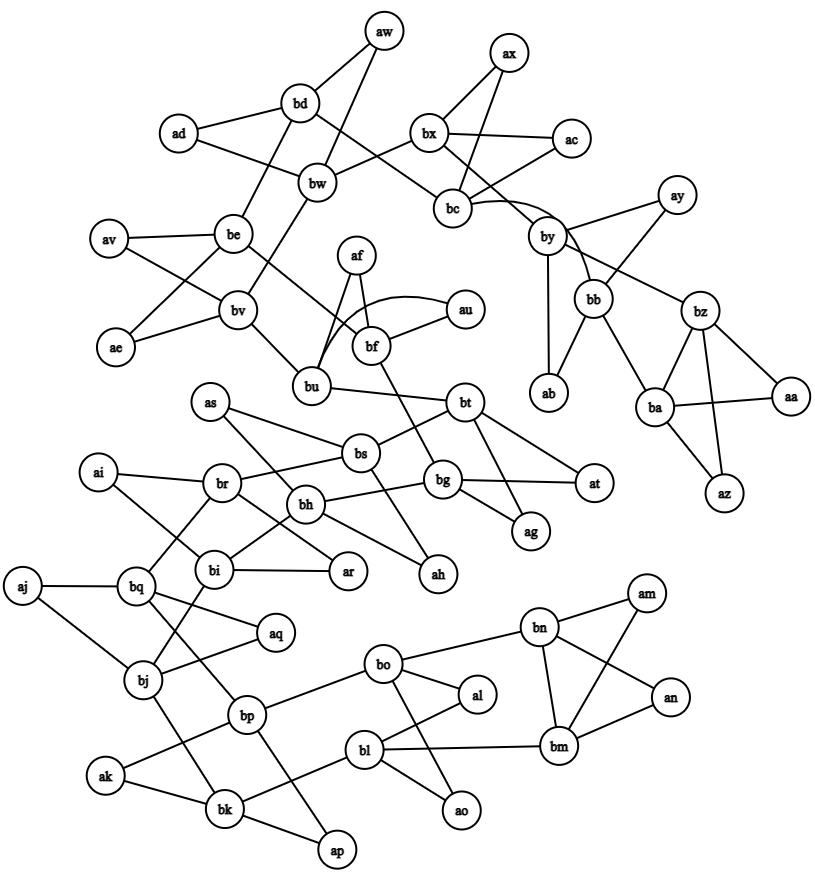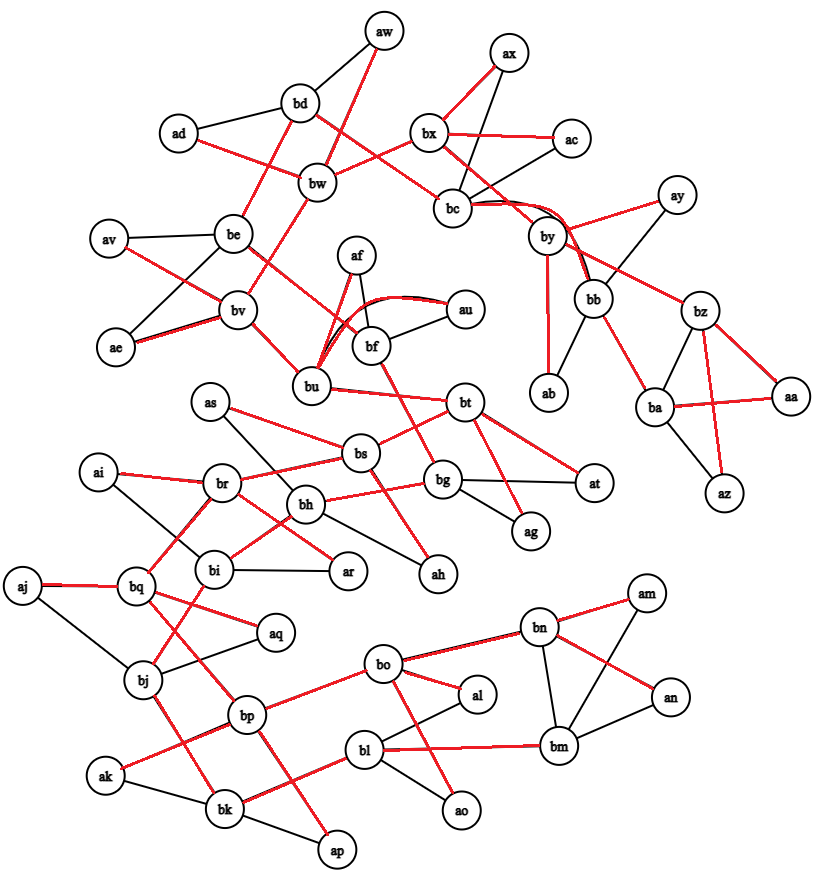

# DONE My Report on What I Did and What I Learned

## Fun


I enjoyed this assignment quite a bit. Maneuvering the connections and nodes was a challenge and made me work with the data in a new way.

## New

The most important thing that I learned was the way that Python handles optional variables being passed into a function. It does not work how I am used to and it took me a while to identify the bug.

## Meaningful


One meaningful thing I achieved is that I now have a custom-built way to view undirected graphs. This is a tool I can use in the future that will make this kind of work easier.

## Other

### Connections
I spent a lot of time during this assignment remarking on the similarities and overlap between spanning trees and pathfinding algorithms that I have used for rudimentary AI while programming video games.

### Collaborator
I worked in several different groups this week however only when I was paired with Paul Semadeni do I think that I did work pertaining to this PP assignment. Other than that I worked alone.

###Contributions
I used this tool in order to visualize the graphs for this assignment and generate the images.
https://csacademy.com/app/graph_editor/

# DONE What is True?
Click on each warranted checkbox to toggle it to True (or back to False). 

NOTE: *This only works in Colab. If you run it in some other Jupyter notebook client/server environment you may have to change False to True (or vice versa) manually.*

This self-assessment is subject to revision by a grader.

In [ ]:
#@markdown ## What is True about what I did?
#@markdown ### I had fun.
cb00 = True #@param {type:'boolean'}
#@markdown ### I learned something new.
cb01 = True #@param {type:'boolean'}
#@markdown ### I achieved something meaningful, or something I can build upon at a later time.
cb02 = True #@param {type:'boolean'}
#@markdown ## What is True about my report?
#@markdown ### I wrote a sufficient number of well-written sentences.
cb03 = True #@param {type:'boolean'}
#@markdown ### My report is free of mechanical infelicities.
cb04 = True #@param {type:'boolean'}
#@markdown ### I used Grammarly (or something better described in my report) to check for MIs.
cb05 = True #@param {type:'boolean'}
#@markdown ### I reported on any connections I found between these problems and something I already know. 
cb06 = True #@param {type:'boolean'}
#@markdown ### I reported who were and what contribution each of my collaborators made.
cb07 = True #@param {type:'boolean'}
#@markdown ## What is True about my code?
#@markdown ### I created code to represent a graph as (at a bare minimum) a set of nodes and a set of links.
cb08 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its nodes.
cb09 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its links.
cb10 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns an adjacency list of nodes and links.
cb11 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and a node and returns a list of adjacent nodes to that node.
cb12 = True #@param {type:'boolean'}
#@markdown ### I correctly implemented the spanning tree algorithm.
cb13 = True #@param {type:'boolean'}
#@markdown ## What is true about my testing?
#@markdown ### I created a ladder graph with 2 rungs and tested my code on it.
cb14 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 3 rungs and tested my code on it.
cb15 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 4 rungs and tested my code on it.
cb16 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 5 rungs and tested my code on it.
cb17 = True #@param {type:'boolean'}
#@markdown ### I created a graph from the example at the top of this notebook and tested my code on it.
cb18 = True #@param {type:'boolean'}
#@markdown ### I created three larger graphs (each with more than 20 nodes and more than 40 links) of my own devising and tested my code on it.
cb19 = True #@param {type:'boolean'}